<a href="https://colab.research.google.com/github/luciosjodin/AprendizajeAutomatico1/blob/master/TP2_AA1_Sj%C3%B6din_Lucio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copia TP1 AA1

**Sj√∂din Lucio**

## Indicaciones b√°sicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compa√±ero.

4) copias expl√≠citas de secciones enteras del trabajo de otro ser√° penalizado disminuyendo su puntuaci√≥n.

5) No se olvide de a√±adir las fuentes de inspiraci√≥n de su c√≥digo (blogs, prompts de chatgpt o similar).

6) Adem√°s de todo el c√≥digo que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada secci√≥n. Esto le ayudar√° al momento del coloquio / parcial

7) Revise las fecha l√≠mite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien m√°s en el foro.
  - Puede comentar m√°s de un posteo de sus compa√±eros siempre y cuando el intercambio sea respetuoso y fruct√≠fero.
* Deben postear como soluci√≥n un enlace a su notebook colab p√∫blico y tambi√©n un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su soluci√≥n y explique lo realizado. Duraci√≥n m√°xima: 5 minutos. Puede grabarse a Ud. mismo usando una sesi√≥n de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces err√≥neos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicaci√≥n de Regresi√≥n Lineal y An√°lisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresi√≥n lineal a un dataset de su elecci√≥n, evaluar su rendimiento e identificar las variables m√°s relevantes para la predicci√≥n.

---

# **Instrucciones**:

#1. **Selecci√≥n del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables num√©ricas continuas (1 target, 3 o m√°s features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligi√≥. Continue al siguiente punto.  



## Resoluci√≥n:

Para trabajar en este TP he seleccionado el dataset "Concrete_Data", que trata sobre los diferentes componentes del concreto y se puede analizar c√≥mo afectan la fuerza compresiva del concreto, variable que ser√° el target del modelo de regresi√≥n lineal

Importo la librer√≠a pandas y con la url del repositorio, descargo en el notebook el dataset "Concrete_Data"

In [2]:
import pandas as pd

url = 'https://github.com/luciosjodin/AprendizajeAutomatico1/raw/refs/heads/master/Concrete_Data.xls'

df = pd.read_excel(url)

df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075


## 2. **An√°lisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribuci√≥n, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gr√°ficos de dispersi√≥n (scatterplots) entre features y target.  
   - **Pregunta clave**: ¬øQu√© relaciones lineales preliminares observan?  


## Resoluci√≥n:

In [3]:
print('Informaci√≥n del df:')
df.info()
print('\nAn√°lisis estad√≠stico del df: ')
df.describe()

Informaci√≥n del df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strengt

Cement (component 1)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  281.165631   
std                                   104.507142   
min                                   102.000000   
25%                                   192.375000   
50%                                   272.900000   
75%                                   350.000000   
max                                   540.000000   

       Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
count                                        1030.000000       
mean                                           73.895485       
std                                            86.279104       
min                                             0.000000       
25%                                             0.000000       
50%                                            22.000000       
75%                                           142.950000       
max                                           359.400000       

       Fly Ash (component 3)(kg in a m^3 mixture)  \
count                                 1030.000000   
mean                                    54.187136   
std                                     63.996469   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                    118.270000   
max                                    200.100000   

       Water  (component 4)(kg in a m^3 mixture)  \
count                                1030.000000   
mean                                  181.566359   
std                                    21.355567   
min                                   121.750000   
25%                                   164.900000   
50%                                   185.000000   
75%                                   192.000000   
max                                   247.000000   

       Superplasticizer (component 5)(kg in a m^3 mixture)  \
count                                        1030.000000     
mean                                            6.203112     
std                                             5.973492     
min                                             0.000000     
25%                                             0.000000     
50%                                             6.350000     
75%                                            10.160000     
max                                            32.200000     

       Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
count                                        1030.000000      
mean                                          972.918592      
std                                            77.753818      
min                                           801.000000      
25%                                           932.000000      
50%                                           968.000000      
75%                                          1029.400000      
max                                          1145.000000      

       Fine Aggregate (component 7)(kg in a m^3 mixture)    Age (day)  \
count                                        1030.000000  1030.000000   
mean                                          773.578883    45.662136   
std                                            80.175427    63.169912   
min                                           594.000000     1.000000   
25%                                           730.950000     7.000000   
50%                                           779.510000    28.000000   
75%                                           824.000000    56.000000   
max                                           992.600000   365.000000   

       Concrete compressive strength(MPa, megapascals)   
count                                       1030.000000  
mean                                          35.817836  
std                                           16.705679

Generaci√≥n de los gr√°ficos:

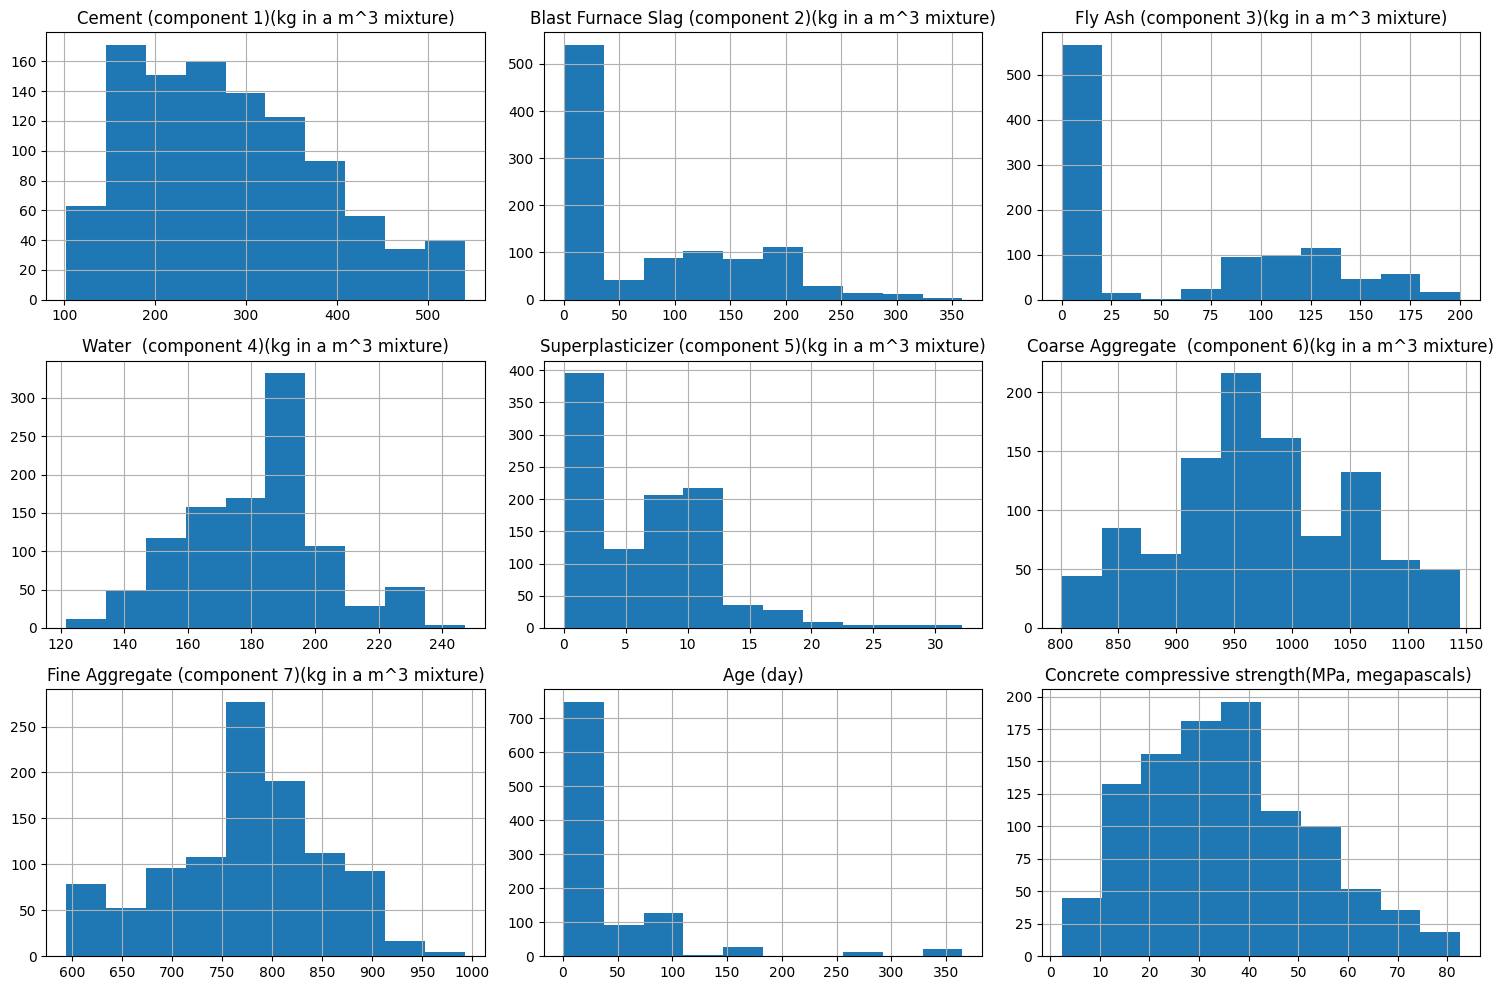

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [5]:
#Aqu√≠ ya defino de entrada el target, y las features
target = 'Concrete compressive strength(MPa, megapascals) '
features = df.columns.drop(target)

for feature in features:
    fig = px.scatter(df, x=feature, y=target,
                     title=f'{feature} vs {target}',
                     trendline="ols")
    fig.show()

**An√°lisis Exploratorio de Datos**

Con base en el resultado del df.describe, los histogramas, boxplots y scatterplots podemos analizar por cada variable (componente):
*   **Cement (component 1)**:
    *   **Media y Distribuci√≥n:** La media es de aproximadamente 281 kg/m¬≥. El histograma muestra una distribuci√≥n que tiende a ser bimodal o con dos picos, indicando quiz√°s dos rangos comunes de contenido de cemento en las mezclas. La distribuci√≥n no parece ser perfectamente normal y hay una dispersi√≥n considerable (desviaci√≥n est√°ndar es de 104.5).
*   **Blast Furnace Slag (component 2)**:
    *   **Media y Distribuci√≥n:** La media es de aproximadamente 73.9 kg/m¬≥. El histograma muestra una distribuci√≥n fuertemente sesgada hacia la izquierda, con una gran concentraci√≥n de valores en 0. Esto indica que muchas mezclas no contienen escoria de alto horno. Cuando est√° presente, la cantidad var√≠a considerablemente (la desviaci√≥n est√°ndar es de 86.3).
*   **Fly Ash (component 3)**:
    *   **Media y Distribuci√≥n:** La media es de aproximadamente 54.2 kg/m¬≥. Similar a la variable anterior, el histograma muestra una distribuci√≥n fuertemente sesgada hacia la izquierda con muchos valores en 0, indicando que muchas mezclas tampoco contienen ceniza vol√°til. Cuando est√° presente, la cantidad var√≠a (la desviaci√≥n est√°ndar es de casi 64).
*   **Water (component 4)**:
    *   **Media y Distribuci√≥n:** La media es de aproximadamente 181.6 kg/m¬≥. El histograma muestra una distribuci√≥n que parece m√°s sim√©trica, cercana a una distribuci√≥n normal, aunque con una ligera cola hacia la derecha. La desviaci√≥n est√°ndar es baja (21.4) en comparaci√≥n con la media, lo que sugiere que la cantidad de agua tiende a estar m√°s concentrada alrededor de los valores de la media.
*   **Superplasticizer (component 5)**:
    *   **Media y Distribuci√≥n:** La media es de aproximadamente 6.2 kg/m¬≥. El histograma muestra una distribuci√≥n fuertemente sesgada hacia la izquierda, con muchos valores en 0. Esto indica que muchas mezclas no utilizan superplastificante. Cuando se usa, la cantidad var√≠a (casi 6 puntos de desviaci√≥n est√°ndar).
*   **Coarse Aggregate (component 6)**:
    *   **Media y Distribuci√≥n:** La media es de aproximadamente 972.9 kg/m¬≥. El histograma muestra una distribuci√≥n que parece relativamente sim√©trica, aunque con una ligera dispersi√≥n. Los valores est√°n bastante concentrados alrededor de la media (la desviaci√≥n est√°ndar es de 77.7).
*   **Fine Aggregate (component 7)**:
    *   **Media y Distribuci√≥n:** La media es de aproximadamente 773.6 kg/m¬≥. El histograma muestra una distribuci√≥n que parece relativamente sim√©trica, con una dispersi√≥n moderada. La desviaci√≥n est√°ndar es de 80.2.
*   **Age (day)**:
    *   **Media y Distribuci√≥n:** La media es de aproximadamente 45.7 d√≠as. El histograma muestra una distribuci√≥n fuertemente sesgada hacia la derecha, con una gran concentraci√≥n de datos en edades tempranas (principalmente 28 d√≠as, que es una edad de prueba com√∫n para el concreto). Hay valores significativamente m√°s altos que representan pruebas a edades mucho mayores. La desviaci√≥n est√°ndar es de 63 puntos.
*   **Concrete compressive strength (target)**:
    *   **Media y Distribuci√≥n:** La media es de aproximadamente 35.8 MPa. El histograma muestra una distribuci√≥n que parece relativamente sim√©trica, aunque quiz√°s con una ligera cola hacia la derecha. La desviaci√≥n est√°ndar es de 16.7 MPa, indicando una dispersi√≥n considerable en la resistencia.

**Relaciones Lineales Preliminares (basado en los Scatterplots):**
*   **Cement vs. Strength:** Se observa una **clara relaci√≥n lineal positiva**. A medida que aumenta la cantidad de cemento, la resistencia a la compresi√≥n tiende a aumentar. La tendencia lineal visualizada por la l√≠nea OLS es bastante evidente.
*   **Blast Furnace Slag vs. Strength:** Parece haber una **relaci√≥n lineal positiva**, aunque quiz√°s no tan fuerte como con el cemento. La dispersi√≥n es mayor, pero la tendencia general es que m√°s escoria se asocia con mayor resistencia.
*   **Fly Ash vs. Strength:** La relaci√≥n lineal parece ser **d√©bil o ligeramente positiva**. La dispersi√≥n es considerable y la tendencia lineal no es tan pronunciada como con el cemento o la escoria.
*   **Water vs. Strength:** Se observa una **relaci√≥n lineal negativa**. A medida que aumenta la cantidad de agua, la resistencia a la compresi√≥n tiende a disminuir. Esta relaci√≥n parece ser moderadamente fuerte.
*   **Superplasticizer vs. Strength:** La relaci√≥n lineal parece ser **d√©bil o ligeramente positiva**. Similar a la ceniza vol√°til, la dispersi√≥n es alta y la tendencia lineal no es muy marcada.
*   **Coarse Aggregate vs. Strength:** La relaci√≥n lineal parece ser **muy d√©bil o casi inexistente**. Los puntos est√°n muy dispersos y la l√≠nea de tendencia es casi plana.
*   **Fine Aggregate vs. Strength:** La relaci√≥n lineal parece ser **muy d√©bil o ligeramente negativa**. Similar al agregado grueso, la dispersi√≥n es alta y la tendencia lineal es muy poco pronunciada.
*   **Age vs. Strength:** Se observa una **clara relaci√≥n lineal positiva**. A medida que aumenta la edad del concreto, su resistencia a la compresi√≥n tiende a aumentar significativamente. La tendencia lineal es bastante fuerte, especialmente visible para edades m√°s tempranas.

**En resumen:**

Al menos preliminarmente, las variables que parecen tener las relaciones lineales m√°s fuertes con la resistencia a la compresi√≥n del concreto (el target) son **Cement** y **Age**, ambas con relaciones positivas. **Water** muestra una relaci√≥n lineal negativa bastante notable. Las dem√°s variables  parecen tener relaciones lineales m√°s d√©biles o casi nulas con el target. Este an√°lisis exploratorio sugiere que un modelo lineal podr√≠a capturar parte de la variabilidad en la resistencia, pero las relaciones que no son lineales  podr√≠an ser importantes, especialmente considerando la distribuci√≥n de algunas variables y la dispersi√≥n observada

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cu√°les features descarta. Justifique.
   - Indique si usar√° o no variables categ√≥ricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes despu√©s.  
   - Dividan en train/test (70-30 o 80-20).  

## Resoluci√≥n:

Procedo a verificar la existencia de nulos y a observar los outliers

In [6]:
print("Valores faltantes por columna:\n")
print(df.isnull().sum())


Valores faltantes por columna:

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


No hay datos nulos

In [7]:
print("\nTipos de datos de las columnas:")
print(df.dtypes)


Tipos de datos de las columnas:
Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


Todas las features son num√©ricas, por lo que no se requiere codificaci√≥n de variables categ√≥ricas.

In [8]:
# IQR
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# L√≠mites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificaci√≥n de outliers
outliers = ((df[features] < lower_bound) | (df[features] > upper_bound)).sum()

print("N√∫mero de outliers por caracter√≠stica (usando m√©todo IQR):")
print(outliers)

# Porcentaje
total_rows = len(df)
outliers_percentage = (outliers / total_rows) * 100

print("\nPorcentaje de outliers por caracter√≠stica:")
print(outliers_percentage.round(2))

N√∫mero de outliers por caracter√≠stica (usando m√©todo IQR):
Cement (component 1)(kg in a m^3 mixture)                 0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     2
Fly Ash (component 3)(kg in a m^3 mixture)                0
Water  (component 4)(kg in a m^3 mixture)                 9
Superplasticizer (component 5)(kg in a m^3 mixture)      10
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0
Fine Aggregate (component 7)(kg in a m^3 mixture)         5
Age (day)                                                59
dtype: int64

Porcentaje de outliers por caracter√≠stica:
Cement (component 1)(kg in a m^3 mixture)                0.00
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.19
Fly Ash (component 3)(kg in a m^3 mixture)               0.00
Water  (component 4)(kg in a m^3 mixture)                0.87
Superplasticizer (component 5)(kg in a m^3 mixture)      0.97
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.00
Fine Aggregate (component 7)

**An√°lisis de los outliers seg√∫n feature:**
*   **Cement (component 1)**:
    *   **Outliers:** El an√°lisis IQR no identific√≥ outliers significativos en esta variable.
*   **Blast Furnace Slag (component 2)**:
    *   **Outliers:** El an√°lisis IQR identific√≥ 2 posibles outliers, que son valores relativamente altos comparados con el resto de la distribuci√≥n. Dado el sesgo, estos podr√≠an representar mezclas con un contenido elevado de escoria, lo cual podr√≠a ser v√°lido.
*   **Fly Ash (component 3)**:
    *   **Outliers:** El an√°lisis IQR no identific√≥ outliers significativos en esta variable.
*   **Water (component 4)**:
    *   **Outliers:** El an√°lisis IQR identific√≥ 9 posibles outliers, que son valores de agua relativamente altos.
*   **Superplasticizer (component 5)**:
    *   **Outliers:** El an√°lisis IQR identific√≥ 10 posibles outliers, que son valores de superplastificante relativamente altos.
*   **Coarse Aggregate (component 6)**:
    *   **Outliers:** El an√°lisis IQR no identific√≥ outliers significativos en esta variable.
*   **Fine Aggregate (component 7)**:
    *   **Outliers:** El an√°lisis IQR identific√≥ 5 posibles outliers, que son valores de agregado fino relativamente bajos.
*   **Age (day)**:
    *   **Outliers:** El an√°lisis IQR identific√≥ 59 posibles outliers. Dada la naturaleza de la variable "Age" (el concreto se prueba a diferentes edades para ver c√≥mo desarrolla resistencia con el tiempo), estos valores altos son esperables y probablemente representan datos v√°lidos de pruebas a largo plazo. No se deber√≠an eliminar a priori.

Considerando la naturaleza del dataset y la distribuci√≥n de los outliers, se decide mantener todas las caracter√≠sticas para el modelo de regresi√≥n lineal.

In [9]:
# Importaci√≥n de librer√≠as para modelo de regresi√≥n lineal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() #Escalador
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDatos preprocesados exitosamente: escalados y divididos en conjuntos de entrenamiento y prueba.")
print("Forma de las caracter√≠sticas de entrenamiento:", X_train_scaled.shape)
print("Forma de las caracter√≠sticas de prueba:", X_test_scaled.shape)


Datos preprocesados exitosamente: escalados y divididos en conjuntos de entrenamiento y prueba.
Forma de las caracter√≠sticas de entrenamiento: (824, 8)
Forma de las caracter√≠sticas de prueba: (206, 8)


Los datos se han dividido en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba) y las caracter√≠sticas se han escalado usando `StandardScaler`.




## 4. **Regresi√≥n Lineal**  
   - Ajusten un modelo de regresi√≥n lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar m√©tricas en el set de entrenamiento y en el de testeo: **R¬≤**, MSE (error cuadr√°tico medio), MAE.  


In [10]:
model = LinearRegression() # Inicializaci√≥n del modelo
model.fit(X_train_scaled, y_train) #Entrenamiento

coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_}) #Coeficientes
print("Coeficientes del modelo:")
display(coefficients_df)

Coeficientes del modelo:


Feature  Coefficient
0          Cement (component 1)(kg in a m^3 mixture)    12.786504
1  Blast Furnace Slag (component 2)(kg in a m^3 m...     9.432883
2         Fly Ash (component 3)(kg in a m^3 mixture)     5.255609
3          Water  (component 4)(kg in a m^3 mixture)    -2.892085
4  Superplasticizer (component 5)(kg in a m^3 mix...     1.841103
5  Coarse Aggregate  (component 6)(kg in a m^3 mi...     1.400255
6  Fine Aggregate (component 7)(kg in a m^3 mixture)     1.947380
7                                          Age (day)     7.037787

In [11]:
import numpy as np

# Predicciones
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Resultados. Conjunto de Entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\nEvaluaci√≥n del conjunto de entrenamiento:")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

# Resultados. Conjunto de Prueba
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nEvaluaci√≥n del conjunto de prueba:")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")


Evaluaci√≥n del conjunto de entrenamiento:
RMSE: 10.52
MAE: 8.33
R-squared: 0.61

Evaluaci√≥n del conjunto de prueba:
RMSE: 9.80
MAE: 7.75
R-squared: 0.63


**Bas√°ndonos en las m√©tricas que obtuvimos:**

R-squared (R¬≤):
* En el conjunto de entrenamiento: R¬≤ = 0.61
* En el conjunto de prueba: R¬≤ = 0.63

Un R¬≤ de 0.63 en el conjunto de prueba indica que aproximadamente el 63% de la variabilidad en la resistencia a la compresi√≥n puede ser explicada por las variables incluidas en nuestro modelo lineal.

RMSE (Root Mean Squared Error):
* En el conjunto de entrenamiento: RMSE = 10.52
* En el conjunto de prueba: RMSE = 9.80

Un RMSE de 9.80 en el conjunto de prueba significa que, en promedio, las predicciones del modelo se desv√≠an en aproximadamente 9.80 MPa de los valores reales de resistencia a la compresi√≥n (target).

MAE (Mean Absolute Error):
* En el conjunto de entrenamiento: MAE = 8.33
* En el conjunto de prueba: MAE = 7.75

Un MAE de 7.75 en el conjunto de prueba significa que, en promedio, la magnitud del error en la predicci√≥n es de alrededor de 7.75 MPa.

**En resumen:**

El rendimiento del modelo en el conjunto de prueba es ligeramente mejor que en el conjunto de entrenamiento.

Esto sugiere que el modelo no est√° sufriendo de sobreajuste (overfitting) significativo.


Un R¬≤ de 0.63 indica que el modelo lineal captura una parte significativa de la relaci√≥n entre las variables de entrada y la resistencia a la compresi√≥n, pero tambi√©n hay una variabilidad considerable que no est√° siendo explicada por este modelo lineal simple.

En general, el modelo lineal proporciona una base √∫til, pero hay espacio para mejorar si se necesita una mayor precisi√≥n en las predicciones. Esto podr√≠a implicar explorar modelos predictivos m√°s complejos

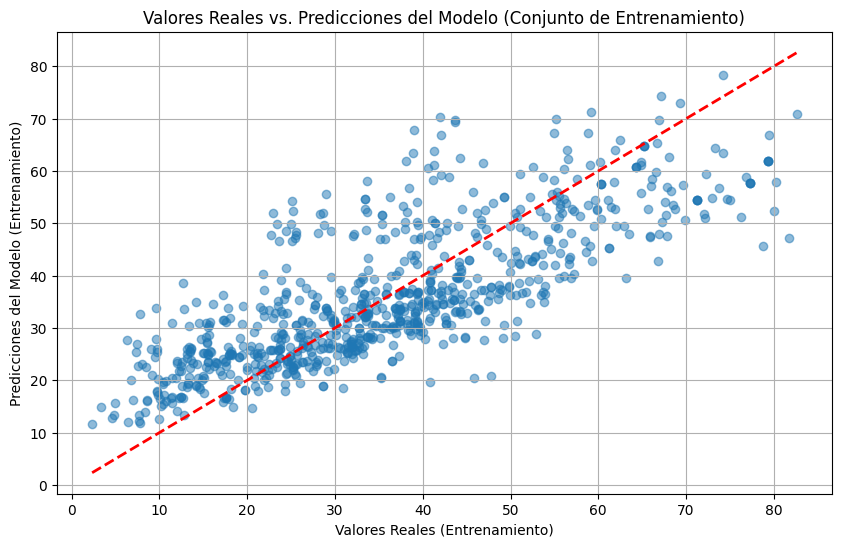

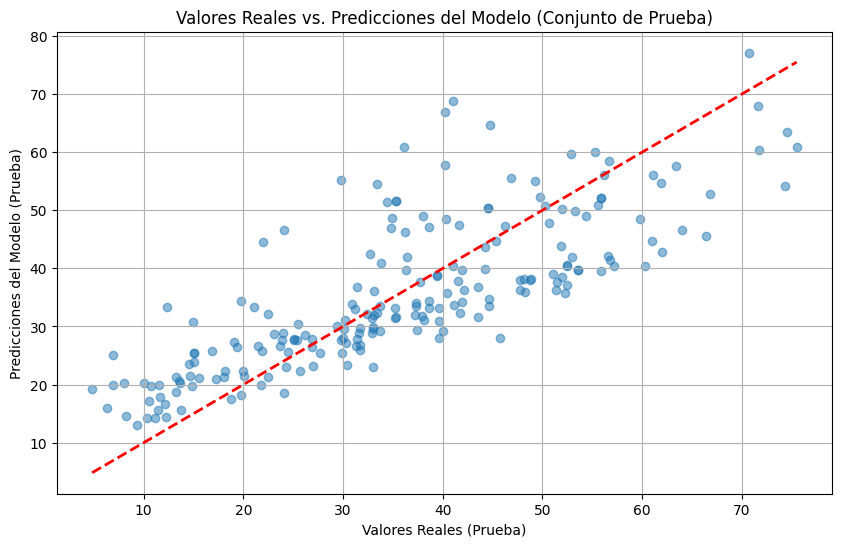

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2) # Add a diagonal line for reference
plt.xlabel("Valores Reales (Entrenamiento)")
plt.ylabel("Predicciones del Modelo (Entrenamiento)")
plt.title("Valores Reales vs. Predicciones del Modelo (Conjunto de Entrenamiento)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Add a diagonal line for reference
plt.xlabel("Valores Reales (Prueba)")
plt.ylabel("Predicciones del Modelo (Prueba)")
plt.title("Valores Reales vs. Predicciones del Modelo (Conjunto de Prueba)")
plt.grid(True)
plt.show()

**Estos gr√°ficos muestran la relaci√≥n entre los valores reales de la resistencia a la compresi√≥n del concreto y los valores predichos por el modelo de regresi√≥n lineal.**

* **Distribuci√≥n de los puntos:**
    
Observamos que los puntos en ambos gr√°ficos tienden a seguir la direcci√≥n de la l√≠nea roja (que representa la situaci√≥n ideal donde los valores predichos son exactamente iguales a los valores reales). Esto indica que hay una **correlaci√≥n positiva** entre los valores reales y las predicciones del modelo, lo cual es un buen signo para un modelo de regresi√≥n. A medida que los valores reales aumentan, las predicciones del modelo tambi√©n tienden a aumentar.

Sin embargo, hay una **dispersi√≥n considerable** de los puntos alrededor de la l√≠nea y  esto representa los errores de predicci√≥n del modelo. üòì

En el conjunto de **entrenamiento** y en el conjunto de **prueba**, la dispersi√≥n es similar, reforzando la conclusi√≥n de que el modelo no parece estar sufriendo de sobreajuste significativo.

**En resumen:**

Los gr√°ficos visualmente confirman que el modelo lineal tiene cierta capacidad predictiva, pero tambi√©n muestran que hay margen de mejora al haber una dispersi√≥n notable alrededor de la l√≠nea de predicci√≥n perfecta. Son una buena representaci√≥n visual de las m√©tricas de error (RMSE y MAE) calculadas previamente


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos ‚Üí mayor impacto en el target.  
     - Signo: Relaci√≥n positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver c√≥mo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen m√©todos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. M√°s info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resoluci√≥n:

In [13]:
display(coefficients_df)

Feature  Coefficient
0          Cement (component 1)(kg in a m^3 mixture)    12.786504
1  Blast Furnace Slag (component 2)(kg in a m^3 m...     9.432883
2         Fly Ash (component 3)(kg in a m^3 mixture)     5.255609
3          Water  (component 4)(kg in a m^3 mixture)    -2.892085
4  Superplasticizer (component 5)(kg in a m^3 mix...     1.841103
5  Coarse Aggregate  (component 6)(kg in a m^3 mi...     1.400255
6  Fine Aggregate (component 7)(kg in a m^3 mixture)     1.947380
7                                          Age (day)     7.037787

Los coeficientes nos indican la magnitud y la direcci√≥n de la relaci√≥n lineal entre cada caracter√≠stica escalada y la resistencia a la compresi√≥n del concreto (el target), manteniendo las otras caracter√≠sticas constantes.

* Variables m√°s importantes:

Las variables con los mayores valores absolutos en sus coeficientes son las que tienen un mayor impacto en la predicci√≥n del target. En este caso, las caracter√≠sticas con los coeficientes de mayor magnitud son:
* * Cement (component 1),
* * Blast Furnace Slag (component 2)
* * Age (day).

Esto sugiere que la cantidad de cemento y la edad del concreto son los factores m√°s influyentes en la resistencia a la compresi√≥n del concreto seg√∫n este modelo.

* Variables menos importantes:

Las variables con los menores valores absolutos en sus coeficientes son las que tienen un menor impacto en la predicci√≥n. Observando la tabla:
* * Coarse Aggregate (component 6) y
* * Superplasticizer (component 5)

Tienen los coeficientes de menor magnitud, lo que indica que su influencia lineal en la resistencia a la compresi√≥n del concreto es menor en comparaci√≥n con las dem√°s variables.

* Direcci√≥n de la relaci√≥n:

Los coeficientes positivos (como los de Cement, Blast Furnace Slag, Fly Ash, Superplasticizer, Coarse Aggregate, y Fine Aggregate) indican que un aumento en la cantidad de estas variables asocia un aumento en la resistencia a la compresi√≥n del concreto. Por otro lado el coeficiente negativo de la variable "Water" indica que un aumento en la cantidad del agua est√° vinculado con una disminuci√≥n en la resistencia a la compresi√≥n del concreto.



## 6. **Reflexi√≥n**  
   - ¬øCu√°les variables son m√°s importantes seg√∫n el modelo? ¬øCoincide con su an√°lisis exploratorio?  
   - ¬øEl modelo tiene buen rendimiento (R¬≤ alto, MSE bajo)? Si no, ¬øa qu√© podr√≠a deberse?  



## Resoluci√≥n:

Bas√°ndonos en el an√°lisis de los coeficientes escalados de nuestro modelo de Regresi√≥n Lineal:

*   **Variables M√°s Importantes**: Las variables con los mayores valores absolutos en sus coeficientes son **Cement (component 1)** , **Blast Furnace Slag** y **Age (day)**. Esto sugiere que la cantidad de cemento, la escoria del horno y la edad del concreto son los factores m√°s influyentes en su resistencia a la compresi√≥n del concreto. **Coincide parcialmente** con el an√°lisis exploratorio del principio del notebook. All√≠ los scatter plots mostraron una tendencia positiva clara entre "Cement" y "Age" con la resistencia a la compresi√≥n del concreto.


*   **Conclusi√≥n del Rendimiento**: Un R¬≤ de 0.63 sugiere que el modelo lineal captura una parte significativa de la relaci√≥n entre las variables de entrada y la resistencia a la compresi√≥n del concreto, pero tambi√©n indica que hay una variabilidad considerable que no est√° siendo explicada por el modelo lineal. El rendimiento en el conjunto de prueba es ligeramente mejor que en el de entrenamiento (mayor R¬≤ y menor RMSE/MAE), lo que sugiere que el modelo no est√° sufriendo de sobreajuste (overfitting) significativo.

Los errores del modelo pueden estar ligados a que puede haber otras variables no incluidas en el dataset que influyan en la resistencia del concreto; o que existan relaciones no lineales que son incomprendidas por el modelo de regresi√≥n lineal y se queda corto, lo que sugiere utilizar un modelo predictivo m√°s robusto.


**En resumen:**

El modelo lineal proporciona una primera aproximaci√≥n √∫til para predecir la resistencia a la compresi√≥n del concreto y destaca la importancia clave del cemento, la escoria y la edad. Sin embargo, para obtener predicciones m√°s precisas, podr√≠a ser necesario explorar modelos m√°s complejos.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¬øMejora el rendimiento?  

In [14]:
# Quita de las features menos importantes
features_reduced = features.drop(['Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)'])
X_reduced = df[features_reduced]

# Divisi√≥n de los conjuntos
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Escalado
scaler_reduced = StandardScaler()
X_train_scaled_reduced = scaler_reduced.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler_reduced.transform(X_test_reduced)

# Inicializaci√≥n y entrenamiento
model_reduced = LinearRegression()
model_reduced.fit(X_train_scaled_reduced, y_train)

# Precicciones
y_train_pred_reduced = model_reduced.predict(X_train_scaled_reduced)
y_test_pred_reduced = model_reduced.predict(X_test_scaled_reduced)

# Evaluaci√≥n de entrenamiento
mse_train_reduced = mean_squared_error(y_train, y_train_pred_reduced)
rmse_train_reduced = np.sqrt(mse_train_reduced)
mae_train_reduced = mean_absolute_error(y_train, y_train_pred_reduced)
r2_train_reduced = r2_score(y_train, y_train_pred_reduced)

print("Evaluaci√≥n del conjunto de entrenamiento (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):")
print(f"RMSE: {rmse_train_reduced:.2f}")
print(f"MAE: {mae_train_reduced:.2f}")
print(f"R-squared: {r2_train_reduced:.2f}")

# Evaluaci√≥n de prueba
mse_test_reduced = mean_squared_error(y_test, y_test_pred_reduced)
rmse_test_reduced = np.sqrt(mse_test_reduced)
mae_test_reduced = mean_absolute_error(y_test, y_test_pred_reduced)
r2_test_reduced = r2_score(y_test, y_test_pred_reduced)

print("\nEvaluaci√≥n del conjunto de prueba (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):")
print(f"RMSE: {rmse_test_reduced:.2f}")
print(f"MAE: {mae_test_reduced:.2f}")
print(f"R-squared: {r2_test_reduced:.2f}")

# Comparaci√≥n con el modelo original
print("\nComparaci√≥n con el modelo original:")
print("Modelo Original (Conjunto de Prueba):")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")

Evaluaci√≥n del conjunto de entrenamiento (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):
RMSE: 10.60
MAE: 8.42
R-squared: 0.60

Evaluaci√≥n del conjunto de prueba (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):
RMSE: 9.76
MAE: 7.70
R-squared: 0.63

Comparaci√≥n con el modelo original:
Modelo Original (Conjunto de Prueba):
RMSE: 9.80
MAE: 7.75
R-squared: 0.63


**An√°lisis Bonus:**


Entrenado un nuevo modelo de regresi√≥n lineal, tras la eliminaci√≥n de las variables que el an√°lisis de coeficientes sugiri√≥ que eran menos importantes: 'Coarse Aggregate', 'Superplasticizer', y 'Fine Aggregate'.

**Conclusi√≥n Bonus:**

Eliminar las variables con los coeficientes lineales m√°s bajos no result√≥ en una disminuci√≥n significativa del rendimiento del modelo de regresi√≥n lineal en el conjunto de prueba. De hecho, las m√©tricas (R¬≤, RMSE, MAE) son muy similares, e incluso particularmente mejores en el modelo reducido.

Esto podr√≠a sugerir que en algunos casos, eliminar features con baja importancia lineal (seg√∫n los coeficientes) puede simplificar el modelo sin sacrificar el rendimiento en s√≠ mismo, o incluso puede mejorarlo un poco. Es bueno para entender el impacto de las variables en el modelo.


---

### **Tips**:  
- Si el R¬≤ es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¬°la trazabilidad es clave en ciencia de datos!  


# TP2 AA1

**Sj√∂din Lucio**

### 2) Utilice redes neuronales para resolver el problema de regresi√≥n del dataset que Ud. trabaj√≥ en TP1.

Para ello debe:

2.1 Usar MLP con la librer√≠a MLP.

2.2 Presentar un caso donde la MLP sobreajuste.

[Tanto para 2.2, 2.3 y 2.4 deber√° entrenar un modelo de red neuronal multicapa (MLP) con diferentes configuraciones de hiperpar√°metros (modificar nro de neuronas en capas ocultas, nro de capas ocultas).]

# Resoluci√≥n: (‚ÄºÔ∏èEjecutar todas las celdas de c√≥digo)

## B√∫squeda del MLP que sobreajuste (overfitting)

Para trabajar de manera ordenada, seteo 3 configuraciones distintas de hiperpar√°metros, dando lugar a la prueba de 3 modelos que buscar√°n sobreajustar. Para ello entreno los modelos, visualizo gr√°ficos de utilidad, analizo y concluyo la informaci√≥n resultante.

In [139]:
# Asumiendo la ejecuci√≥n de todo c√≥digo previo, por lo tanto ya est√°n armados los conjuntos de entrenamiento, prueba. Preprocesamiento listo.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

#alpha=0 permite pesos grandes
#early_stopping=flase permite itere hasta el max_iter

# Definir los modelos
models = [
    ("mlp_sobreajuste_1", {
        'hidden_layer_sizes': (512, 256, 128, 64, 32, 16),
        'alpha': 0,
        'max_iter': 10000

    }),
    ("mlp_sobreajuste_2", {
        'hidden_layer_sizes': (256, 128, 64, 32),
        'alpha': 0,
        'max_iter': 7000

    }),
    ("mlp_sobreajuste_3", {
        'hidden_layer_sizes': (128, 64, 32, 16),
        'alpha': 0,
        'max_iter': 3000
    })
]

# Lista para almacenar resultados
results = []

# Entrenar y evaluar cada modelo
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,
        random_state=42,
    )
    mlp.fit(X_train_scaled, y_train)
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)

    # Calcular m√©tricas
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Almacenar resultados
    results.append((name, y_train_pred, y_test_pred, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test))

    # Imprimir m√©tricas
    print(f"\n{name}:")
    print(f"MSE train: {mse_train}")
    print(f"MSE test: {mse_test}")
    print(f"RMSE train: {rmse_train:}")
    print(f"RMSE test: {rmse_test:}")
    print(f"R2 train: {r2_train}")
    print(f"R2 test: {r2_test}")




mlp_sobreajuste_1:
MSE train: 10.780361730211737
MSE test: 28.842226630097485
RMSE train: 3.283346117943056
RMSE test: 5.370495938933153
R2 train: 0.9620520344264619
R2 test: 0.8880700681471907

mlp_sobreajuste_2:
MSE train: 9.791640546866086
MSE test: 26.60308129986803
RMSE train: 3.1291597189766596
RMSE test: 5.157817493850285
R2 train: 0.9655324331706228
R2 test: 0.8967596671658595

mlp_sobreajuste_3:
MSE train: 10.174340000347417
MSE test: 30.074531998897275
RMSE train: 3.1897241260565807
RMSE test: 5.484025163955511
R2 train: 0.9641852923186585
R2 test: 0.883287779396721


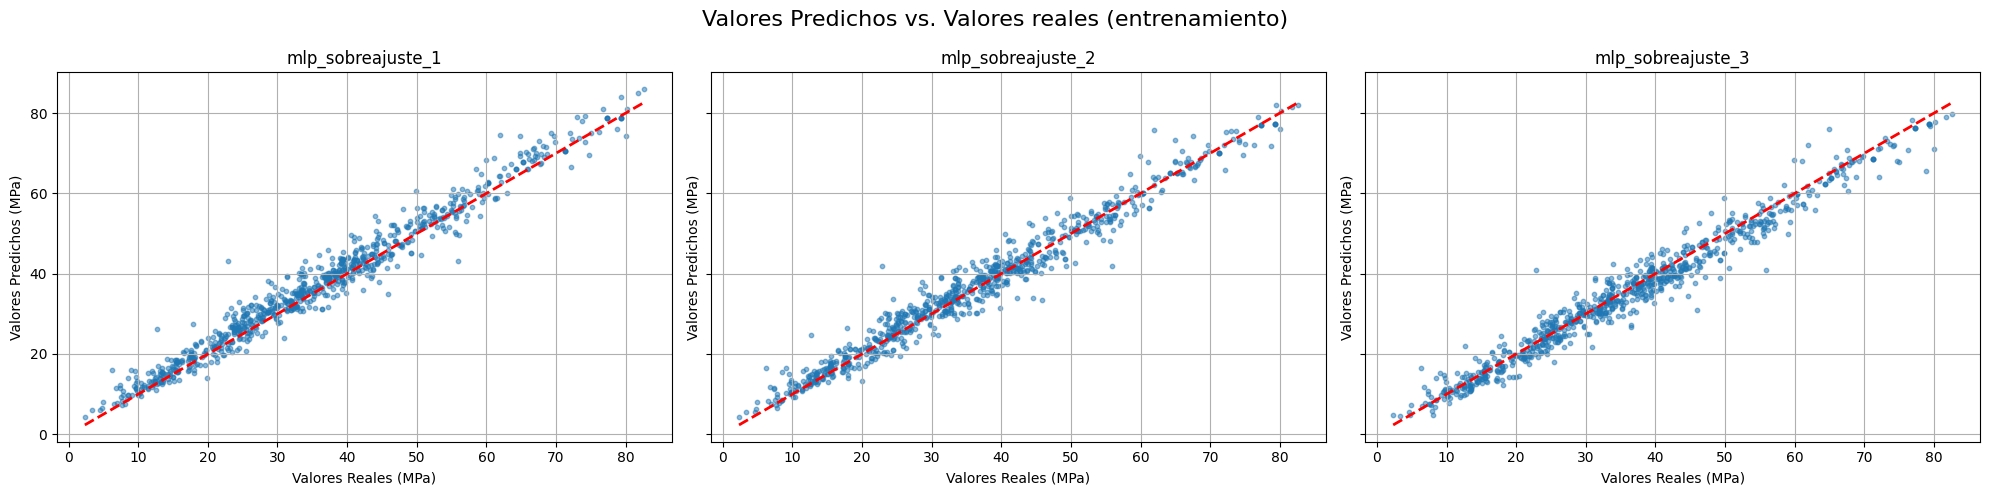

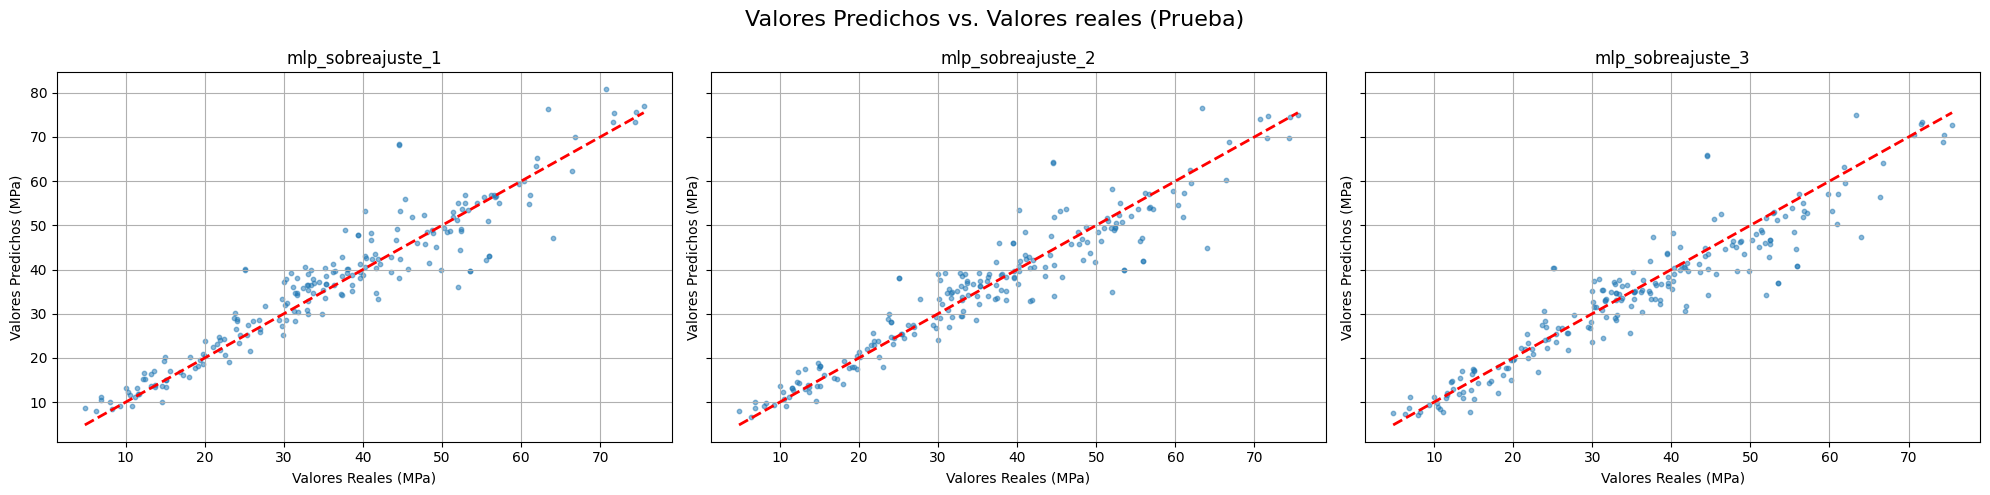

In [122]:
# Crear gr√°fico con subgr√°ficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (entrenamiento)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_train, y_train_pred, alpha=0.5, s=10)
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # L√≠nea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Crear gr√°fico con subgr√°ficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (Prueba)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_test, y_test_pred, alpha=0.5, s=10)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # L√≠nea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

*   **Gr√°ficos de Dispersi√≥n (Valores Predichos vs. Valores Reales):**
    *   En los gr√°ficos del **conjunto de entrenamiento**, los puntos para los tres modelos est√°n muy cerca de la l√≠nea roja diagonal, lo que indica que el modelo predice con mucha precisi√≥n los valores de entrenamiento. Esto es consistente con un alto R¬≤ de entrenamiento y un bajo MSE de entrenamiento.
    *   En los gr√°ficos del **conjunto de prueba**, aunque los puntos a√∫n siguen la tendencia de la l√≠nea diagonal, hay una **mayor dispersi√≥n** alrededor de esta l√≠nea para los tres modelos, especialmente visible en el gr√°fico de `mlp_sobreajuste_3`. Esta mayor dispersi√≥n en el conjunto de prueba, en comparaci√≥n con el conjunto de entrenamiento, es una clara se√±al visual de sobreajuste. El modelo no predice los valores de prueba con la misma precisi√≥n que los de entrenamiento.

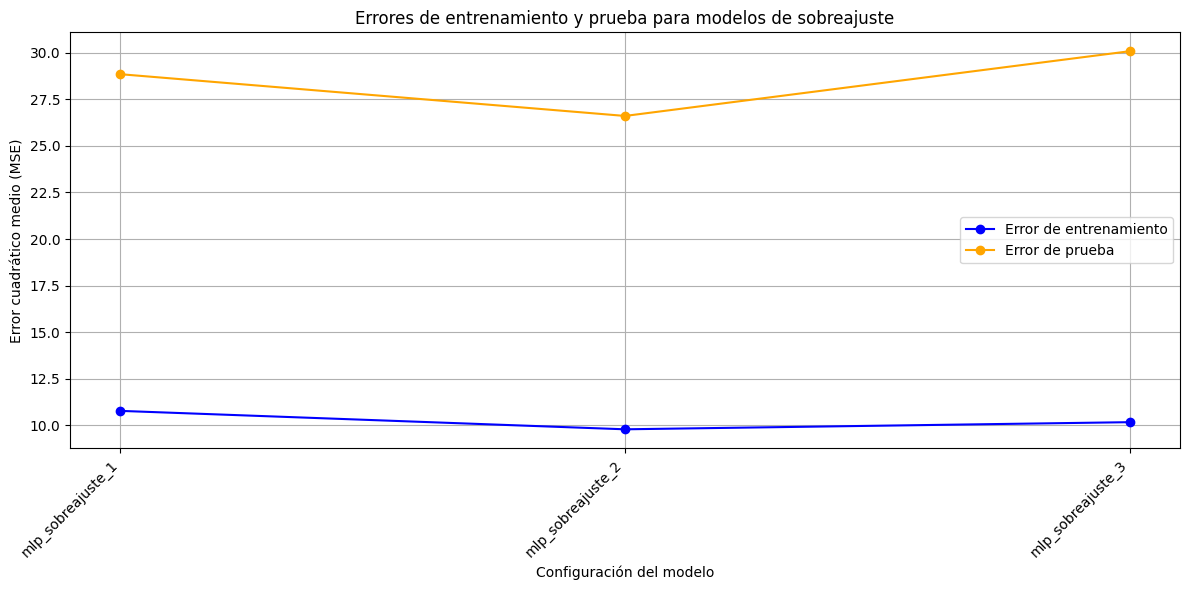

In [123]:
# Graficamos los errores de entrenamiento y prueba
# Usamos los nombres de los modelos y los MSE almacenados en results
model_labels = [result[0] for result in results]
train_error_values = [result[3] for result in results]  # MSE train
test_error_values = [result[4] for result in results]   # MSE test

plt.figure(figsize=(12, 6))
x = np.arange(len(model_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o', color='blue')
plt.plot(x, test_error_values, label='Error de prueba', marker='o', color='orange')
plt.xticks(x, model_labels, rotation=45, ha='right')
plt.xlabel('Configuraci√≥n del modelo')
plt.ylabel('Error cuadr√°tico medio (MSE)')
plt.title('Errores de entrenamiento y prueba para modelos de sobreajuste')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

*   **Gr√°fico de Errores de Entrenamiento y Prueba (MSE):**
    *   Este gr√°fico muestra claramente la brecha entre el MSE de entrenamiento (l√≠nea azul) y el MSE de prueba (l√≠nea naranja) para cada modelo. Para todos los modelos, el MSE de entrenamiento es significativamente menor que el MSE de prueba.
    *   La mayor diferencia entre la l√≠nea azul y la l√≠nea naranja se observa en el modelo `mlp_sobreajuste_3`, lo que visualmente confirma que este modelo es el que presenta el mayor sobreajuste, ya que su error en datos no vistos es mucho mayor que su error en los datos con los que fue entrenado.

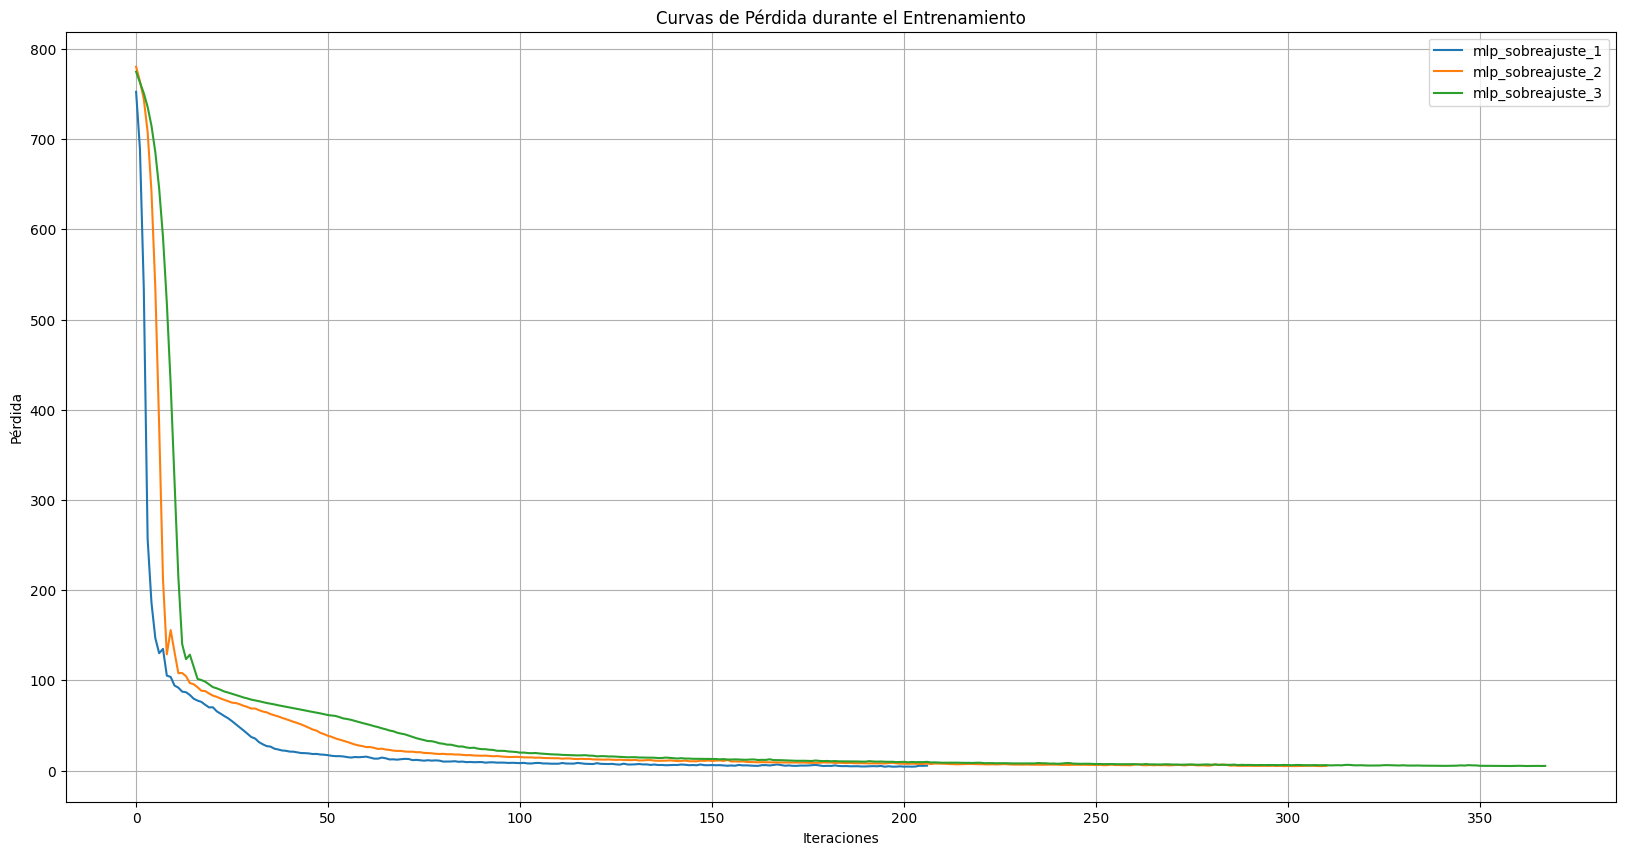

In [125]:
plt.figure(figsize=(20, 10))
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,  # Ajusta seg√∫n tu caso
        random_state=42,
    )
    mlp.fit(X_train_scaled, y_train)
    plt.plot(mlp.loss_curve_, label=name)
plt.xlabel('Iteraciones')
plt.ylabel('P√©rdida')
plt.title('Curvas de P√©rdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

*   **Gr√°fico de Curvas de P√©rdida:**
    *   Las curvas de p√©rdida para los tres modelos de sobreajuste (`mlp_sobreajuste_1`, `mlp_sobreajuste_2`, `mlp_sobreajuste_3`) muestran una disminuci√≥n constante en la p√©rdida a lo largo de las iteraciones, alcanzando valores muy bajos. Esto indica que el optimizador (adam) est√° funcionando y el modelo est√° aprendiendo a minimizar el error en el conjunto de entrenamiento.

**An√°lisis de los Modelos de Sobreajuste:**

Para determinar qu√© modelo sobreajusta m√°s, observamos la diferencia entre el rendimiento en el conjunto de entrenamiento y el conjunto de prueba. Un modelo sobreajustado tiene un rendimiento significativamente mejor en los datos de entrenamiento que en los datos de prueba.

Analizando los resultados de las m√©tricas:

*   **mlp\_sobreajuste\_1:**
    *   MSE train: 10.78
    *   MSE test: 28.84
    *   R2 train: 0.96
    *   R2 test: 0.89
*   **mlp\_sobreajuste\_2:**
    *   MSE train: 9.79
    *   MSE test: 26.60
    *   R2 train: 0.97
    *   R2 test: 0.90
*   **mlp\_sobreajuste\_3:**
    *   MSE train: 10.17
    *   MSE test: 30.07
    *   R2 train: 0.96
    *   R2 test: 0.88

**Conclusi√≥n sobre el Sobreajuste:**

Todos los modelos (`mlp_sobreajuste_1`, `mlp_sobreajuste_2`, y `mlp_sobreajuste_3`) muestran signos de sobreajuste, ya que el R¬≤ es notablemente m√°s alto en el conjunto de entrenamiento que en el conjunto de prueba, y el MSE es significativamente menor en entrenamiento que en prueba. Esto indica que los modelos se ajustaron demasiado bien a los datos de entrenamiento y no generalizan tan bien a datos no vistos.

Observando la mayor diferencia entre el rendimiento en entrenamiento y prueba, el modelo **`mlp_sobreajuste_3`** es el que sobreajusta m√°s severamente. Tiene un R¬≤ de entrenamiento de 0.96 pero un R¬≤ de prueba de solo 0.88, lo que representa una ca√≠da mayor en el rendimiento comparado con los otros modelos. De manera similar, la diferencia entre su MSE de entrenamiento (10.17) y su MSE de prueba (30.07) es la m√°s grande.


### 2.3 Presentar un caso donde la MLP subajuste.

## B√∫squeda del MLP que subajuste (underfitting)

In [138]:
# Definir los modelos para subajuste
models = [
    ("mlp_subajuste_1", {
        'hidden_layer_sizes': (16,),  # Muy simple, 1 capa con pocas neuronas
        'alpha': 10.0,              # Alta regularizaci√≥n
        'max_iter': 50             # Muy pocas iteraciones
    }),
    ("mlp_subajuste_2", {
        'hidden_layer_sizes': (8, 8),  # 2 capas, pero con pocas neuronas
        'alpha': 1.0,                   # Regularizaci√≥n moderada-alta
        'max_iter': 75                 # Iteraciones limitadas
    }),
    ("mlp_subajuste_3", {
        'hidden_layer_sizes': (8,),  # 1 capa con neuronas moderadas
        'alpha': 0.1,                # Regularizaci√≥n ligera
        'max_iter': 200              # Iteraciones moderadas
    })
]

# Lista para almacenar resultados
results = []

# Entrenar y evaluar cada modelo
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)

    # Calcular m√©tricas
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Almacenar resultados
    results.append((name, y_train_pred, y_test_pred, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test))

    # Imprimir m√©tricas
    print(f"\n{name}:")
    print(f"MSE train: {mse_train}")
    print(f"MSE test: {mse_test}")
    print(f"RMSE train: {rmse_train:}")
    print(f"RMSE test: {rmse_test:}")
    print(f"R2 train: {r2_train}")
    print(f"R2 test: {r2_test}")



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.




mlp_subajuste_1:
MSE train: 1323.2035023106646
MSE test: 1286.3318084646237
RMSE train: 36.37586428266227
RMSE test: 35.86546818967548
R2 train: -3.6578103971919225
R2 test: -3.9919527194651856

mlp_subajuste_2:
MSE train: 754.3940853255297
MSE test: 723.9589240833257
RMSE train: 27.46623536863998
RMSE test: 26.906484796110504
R2 train: -1.6555436167401854
R2 test: -1.8095151624777985

mlp_subajuste_3:
MSE train: 543.5964087147338
MSE test: 537.4799053689234
RMSE train: 23.315154057280722
RMSE test: 23.183612862729643
R2 train: -0.9135144367183028
R2 test: -1.085833730930457


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



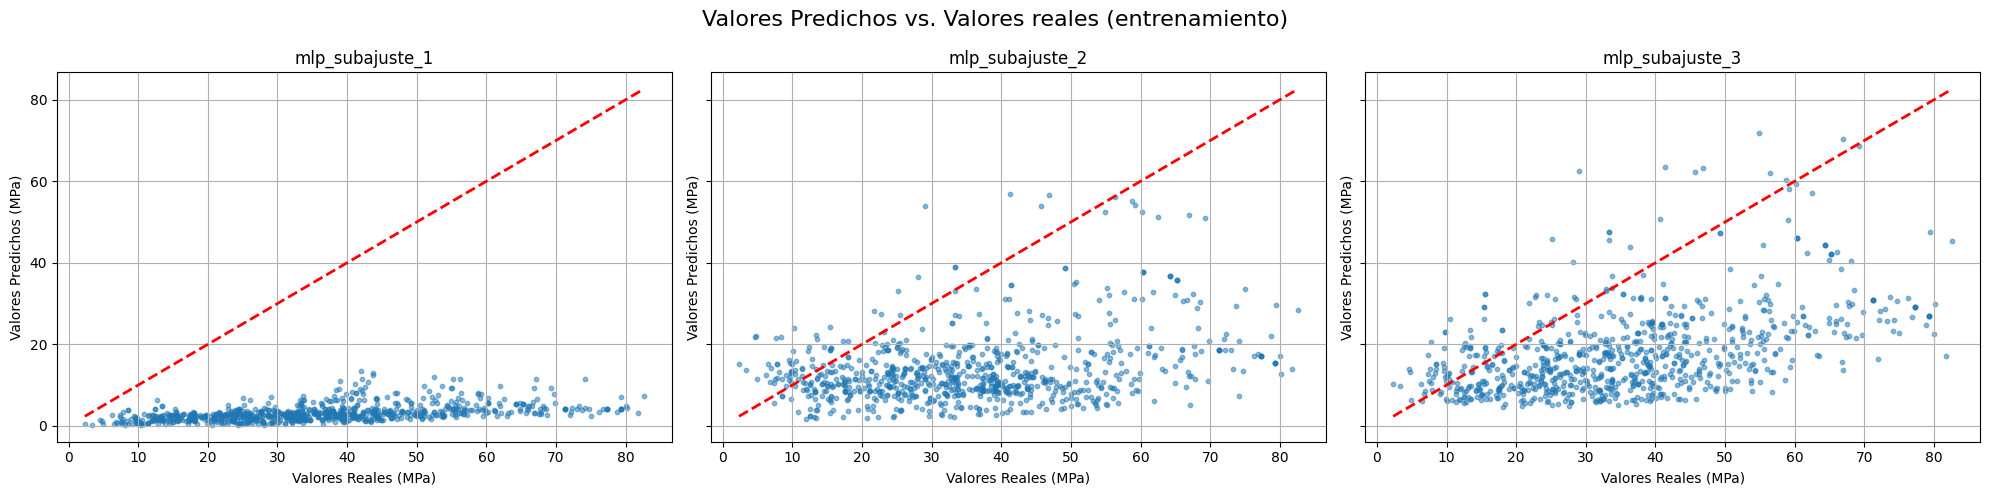

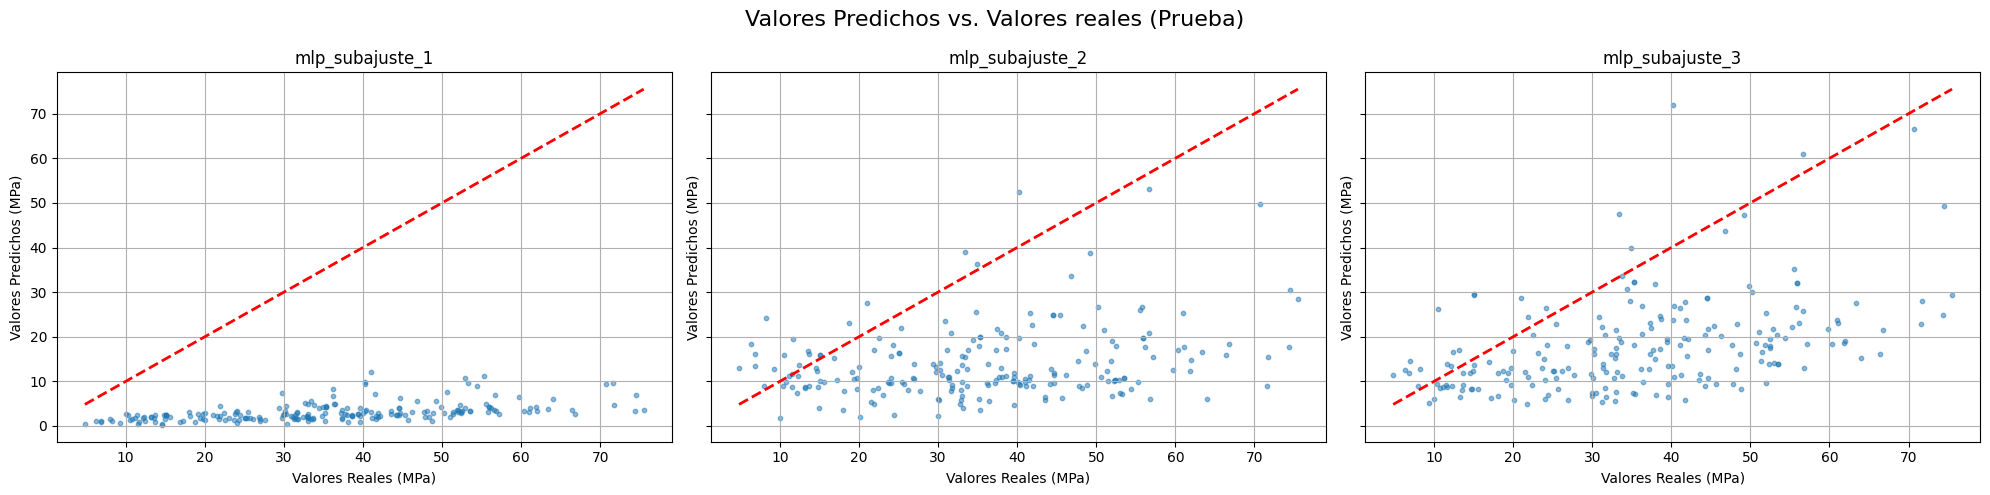

In [127]:
# Crear gr√°fico con subgr√°ficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (entrenamiento)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_train, y_train_pred, alpha=0.5, s=10)
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # L√≠nea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Crear gr√°fico con subgr√°ficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (Prueba)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_test, y_test_pred, alpha=0.5, s=10)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # L√≠nea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

* **Gr√°ficos de Dispersi√≥n (Valores Predichos vs. Valores Reales):**
  * En los gr√°ficos tanto del **conjunto de entrenamiento** como del **conjunto de prueba**, los puntos para los tres modelos de subajuste est√°n muy dispersos y no siguen de cerca la l√≠nea roja diagonal. Esto indica que las predicciones del modelo son muy pobres y no tienen una correlaci√≥n fuerte con los valores reales.
  * La dispersi√≥n es muy similar entre los conjuntos de entrenamiento y prueba para cada modelo, lo que refuerza la idea de subajuste (el modelo no aprende bien en entrenamiento, por lo tanto, tampoco generaliza bien). El gr√°fico para `mlp_subajuste_1` muestra la mayor dispersi√≥n y los puntos m√°s alejados de la l√≠nea ideal.

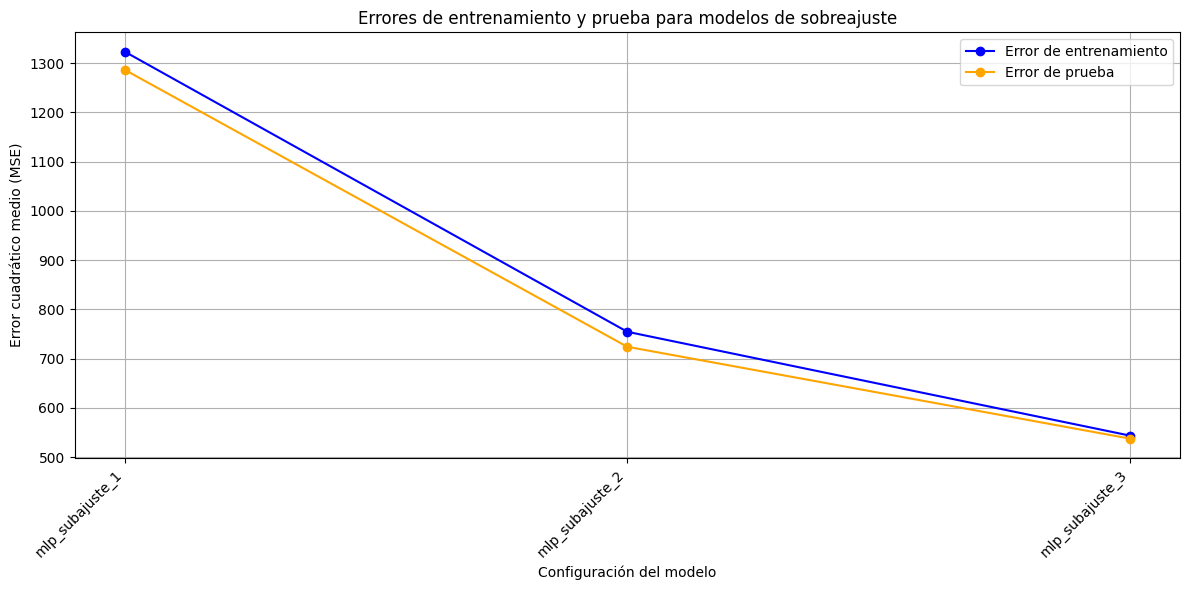

In [128]:
# Graficamos los errores de entrenamiento y prueba
# Usamos los nombres de los modelos y los MSE almacenados en results
model_labels = [result[0] for result in results]
train_error_values = [result[3] for result in results]  # MSE train
test_error_values = [result[4] for result in results]   # MSE test

plt.figure(figsize=(12, 6))
x = np.arange(len(model_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o', color='blue')
plt.plot(x, test_error_values, label='Error de prueba', marker='o', color='orange')
plt.xticks(x, model_labels, rotation=45, ha='right')
plt.xlabel('Configuraci√≥n del modelo')
plt.ylabel('Error cuadr√°tico medio (MSE)')
plt.title('Errores de entrenamiento y prueba para modelos de sobreajuste')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

* **Gr√°fico de Errores de Entrenamiento y Prueba (MSE):**
  * Este gr√°fico muestra MSEs extremadamente altos para los tres modelos, con el MSE de `mlp_subajuste_1` siendo el m√°s alto. La diferencia entre el MSE de entrenamiento y prueba es relativamente peque√±a para todos ellos (en comparaci√≥n con el sobreajuste), lo que es otra caracter√≠stica del subajuste. El modelo no aprende bien ni en entrenamiento ni en prueba.


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (75) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



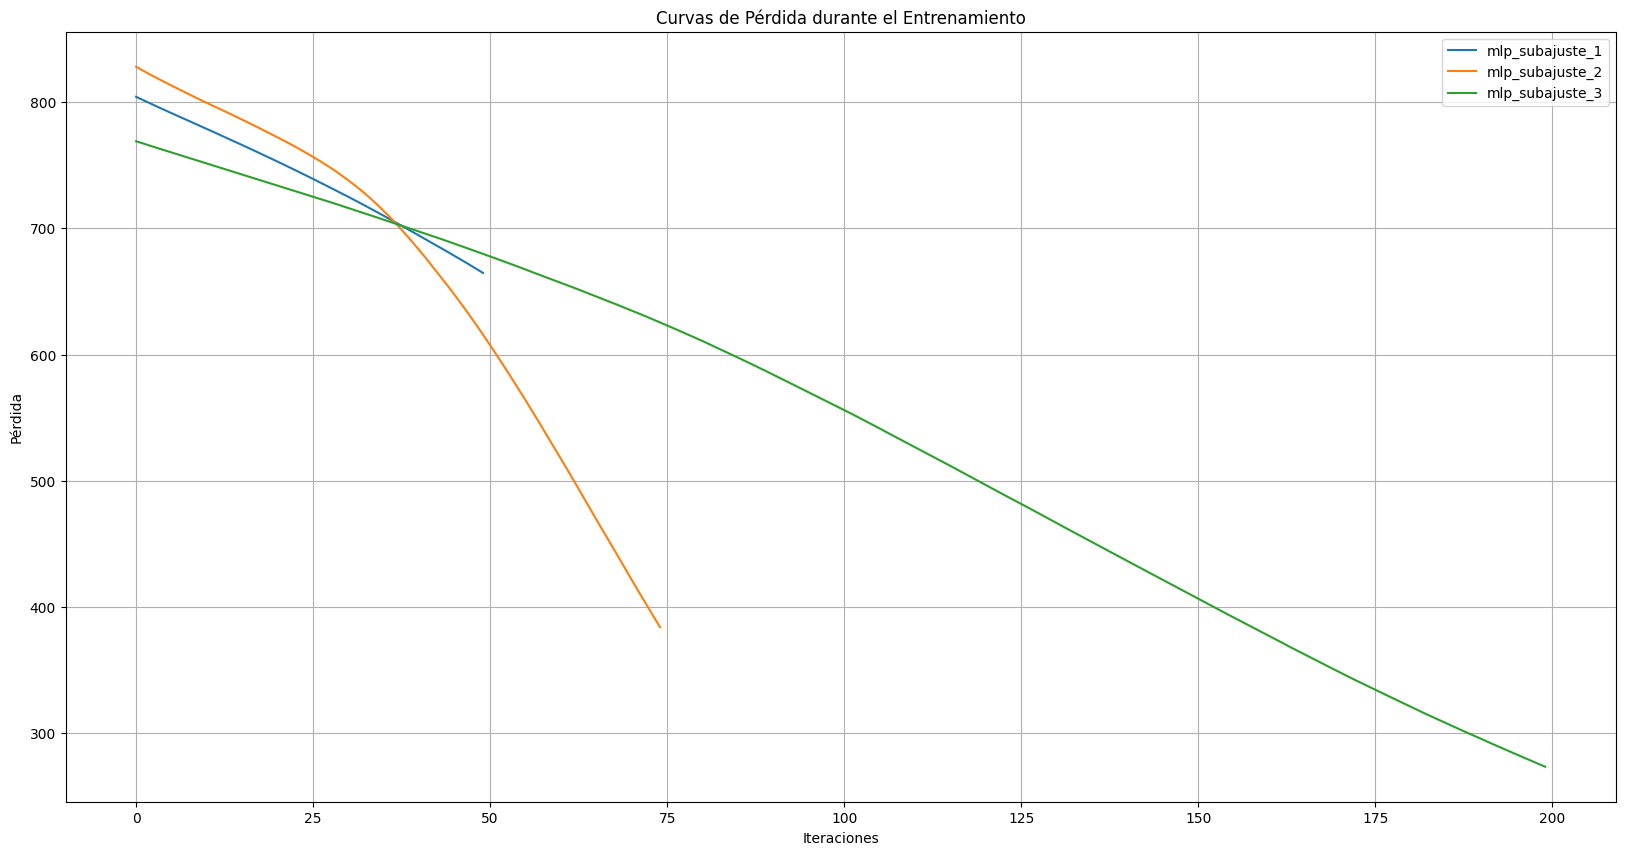

In [129]:
plt.figure(figsize=(20, 10))
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,  # Ajusta seg√∫n tu caso
        random_state=42,
    )
    mlp.fit(X_train_scaled, y_train)
    plt.plot(mlp.loss_curve_, label=name)
plt.xlabel('Iteraciones')
plt.ylabel('P√©rdida')
plt.title('Curvas de P√©rdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

* **Gr√°fico de Curvas de P√©rdida:**
  * Las curvas de p√©rdida para los modelos de subajuste (`mlp_subajuste_1`, `mlp_subajuste_2`, `mlp_subajuste_3`) muestran que la p√©rdida no disminuye significativamente o se estanca en un valor alto. En el caso de `mlp_subajuste_1`, la p√©rdida se mantiene en un nivel muy alto y no muestra una tendencia clara a disminuir debido a la arquitectura limitada y la alta regularizaci√≥n que impiden el aprendizaje. Para `mlp_subajuste_2` y `mlp_subajuste_3`, las p√©rdidas bajan un poco m√°s pero a√∫n se mantienen relativamente altas y no convergen bien debido a las iteraciones limitadas y/o regularizaci√≥n. Las advertencias de convergencia en la salida de la celda de c√≥digo confirman que los modelos no terminaron de entrenarse completamente dentro del n√∫mero de iteraciones especificado, lo que contribuye al subajuste.

**An√°lisis de los Modelos de Subajuste:**

Para determinar qu√© modelo subajusta m√°s, observamos su rendimiento tanto en el conjunto de entrenamiento como en el conjunto de prueba. Un modelo subajustado no logra aprender bien las relaciones en los datos de entrenamiento, lo que resulta en un rendimiento deficiente (bajo R¬≤ y alto MSE/MAE) tanto en entrenamiento como en prueba, con una peque√±a diferencia entre ambos conjuntos.

Analizando los resultados de las m√©tricas:

* **mlp\_subajuste\_1:**
  * MSE train: 1323.20
  * MSE test: 1286.33
  * R2 train: -3.66
  * R2 test: -3.99
* **mlp\_subajuste\_2:**
  * MSE train: 754.39
  * MSE test: 723.96
  * R2 train: -1.66
  * R2 test: -1.81
* **mlp\_subajuste\_3:**
  * MSE train: 543.60
  * MSE test: 537.48
  * R2 train: -0.91
  * R2 test: -1.09

**Conclusi√≥n sobre el Subajuste:**

Todos los modelos (`mlp_subajuste_1`, `mlp_subajuste_2`, y `mlp_subajuste_3`) muestran signos claros de subajuste. Sus valores de R¬≤ son negativos, lo que indica que su rendimiento es incluso peor que un modelo lineal simple que predice la media del target. Los valores de MSE son extremadamente altos en comparaci√≥n con la variabilidad del target.

Observando las m√©tricas, el modelo **`mlp_subajuste_1`** es el que subajusta m√°s severamente. Tiene el R¬≤ m√°s bajo (m√°s negativo) tanto en entrenamiento como en prueba, y el MSE m√°s alto. Esto indica que este modelo fue el que tuvo m√°s dificultades para aprender cualquier patr√≥n en los datos.

Las razones principales de este subajuste extremo en `mlp_subajuste_1` son:
* **`hidden_layer_sizes`: (16,)** - Una arquitectura extremadamente simple con solo una capa oculta y muy pocas neuronas. Esta capacidad limitada le impide capturar la complejidad de las relaciones en el dataset.
* **`alpha`: 10.0** - Una regularizaci√≥n (L2) muy alta. Esta penalizaci√≥n fuerte sobre los pesos limita severamente la capacidad del modelo para ajustarse a los datos, incluso a los de entrenamiento.
* **`max_iter`: 50** - Un n√∫mero muy bajo de iteraciones. El modelo no tuvo tiempo suficiente para que el optimizador encontrara un buen conjunto de pesos, especialmente con la alta regularizaci√≥n y la simple arquitectura.



### 2.4 Presentar el caso donde cree que la MLP funciona de forma aceptable.

## B√∫squeda del MLP aceptable

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Definir los modelos para un ajuste aceptable
models = [
    ("mlp_aceptable_1", {
        'hidden_layer_sizes': (128, 64, 32),  # 3 capas complejas
        'alpha': 0.0001,                 # Regularizaci√≥n ligera
        'max_iter': 1000                # Iteraciones suficientes
    }),
    ("mlp_aceptable_2", {
        'hidden_layer_sizes': (64, 32),  # 2 capas un poco m√°s moderadas
        'alpha': 0.001,                  # Regularizaci√≥n moderada
        'max_iter': 1000                   # Iteraciones moderadas
    }),
    ("mlp_aceptable_3", {
        'hidden_layer_sizes': (32, 16),  # 1 capa simple
        'alpha': 0.01,               # Regularizaci√≥n un poco m√°s alta
        'max_iter': 1000              # Iteraciones limitadas pero suficientes
    })
]

# Lista para almacenar resultados
results = []

# Entrenar y evaluar cada modelo
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=True,  # Activar early stopping para evitar sobreajuste
        random_state=42
    )
    mlp.fit(X_train_scaled, y_train)
    y_train_pred = mlp.predict(X_train_scaled)
    y_test_pred = mlp.predict(X_test_scaled)

    # Calcular m√©tricas
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Almacenar resultados
    results.append((name, y_train_pred, y_test_pred, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test))

    # Imprimir m√©tricas
    print(f"\n{name}:")
    print(f"MSE train: {mse_train}")
    print(f"MSE test: {mse_test}")
    print(f"RMSE train: {rmse_train:}")
    print(f"RMSE test: {rmse_test:}")
    print(f"R2 train: {r2_train}")
    print(f"R2 test: {r2_test}")




mlp_aceptable_1:
MSE train: 27.19748356623111
MSE test: 40.730852409584806
RMSE train: 5.215120666507258
RMSE test: 6.382072736155927
R2 train: 0.9042621021550884
R2 test: 0.8419330936899911

mlp_aceptable_2:
MSE train: 28.679664462552974
MSE test: 33.35144829458997
RMSE train: 5.355339808317766
RMSE test: 5.7750712804769755
R2 train: 0.8990446752231376
R2 test: 0.8705708341217159

mlp_aceptable_3:
MSE train: 26.312189009898052
MSE test: 38.94493488766036
RMSE train: 5.1295408186209075
RMSE test: 6.240587703707108
R2 train: 0.9073784286928165
R2 test: 0.8488638216496398


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



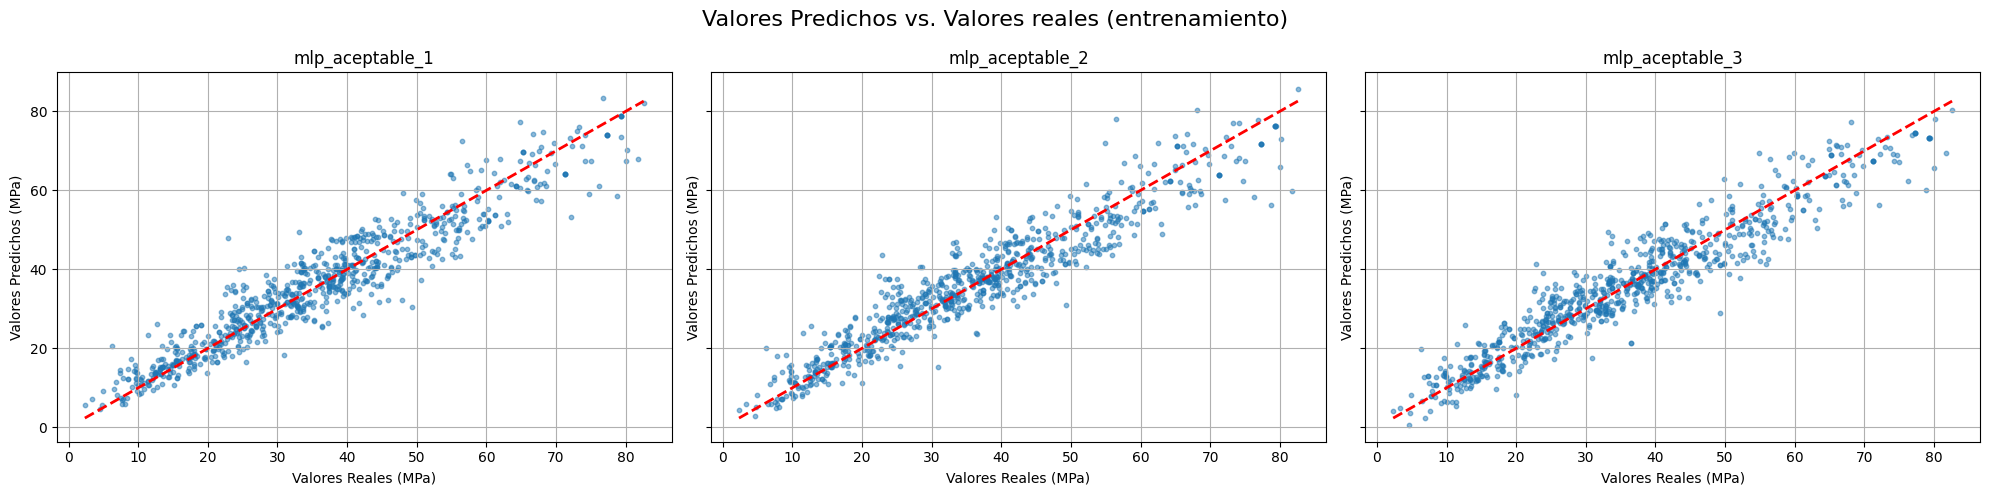

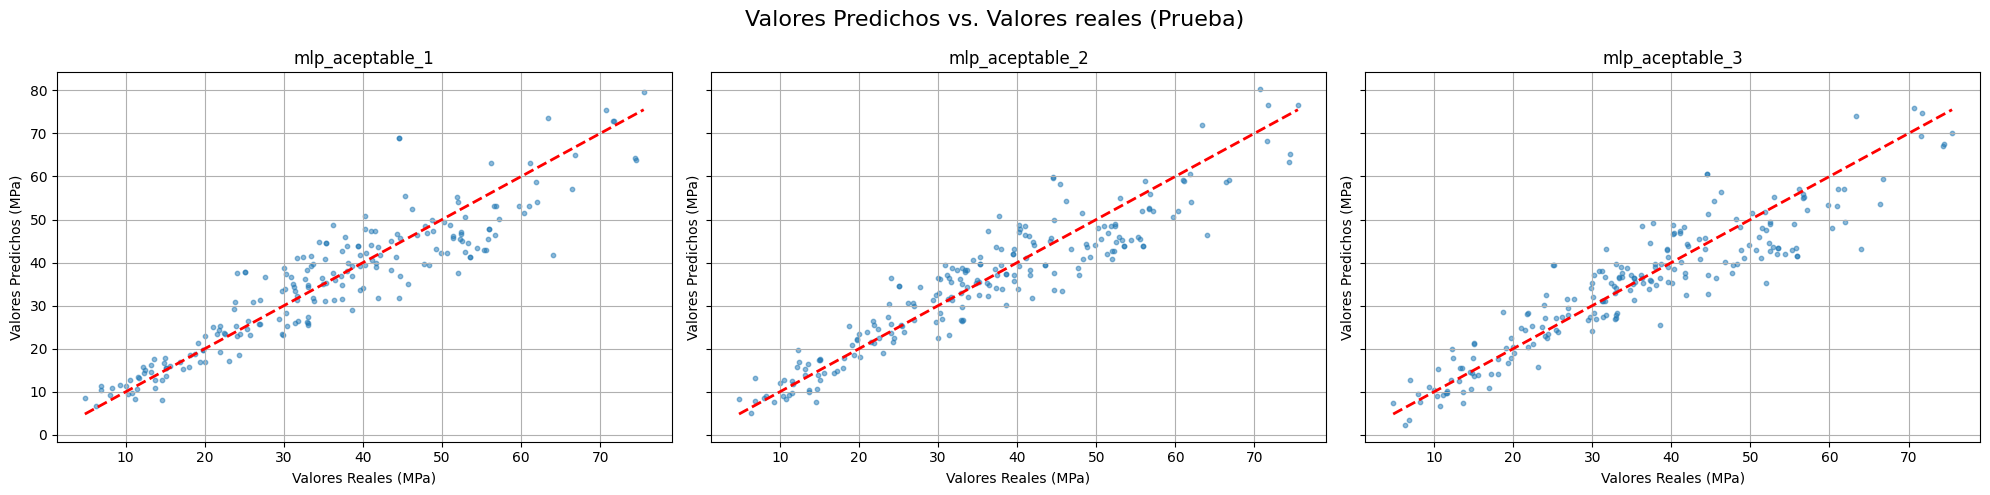

In [131]:
# Crear gr√°fico con subgr√°ficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (entrenamiento)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_train, y_train_pred, alpha=0.5, s=10)
    ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # L√≠nea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Crear gr√°fico con subgr√°ficos
fig, axes = plt.subplots(1, 3, figsize=(20,5), sharex=True, sharey=True)

fig.suptitle('Valores Predichos vs. Valores reales (Prueba)', fontsize=16)

for (name, y_train_pred, y_test_pred, _, _, _, _), ax in zip(results, axes):

    # Graficar
    ax.scatter(y_test, y_test_pred, alpha=0.5, s=10)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # L√≠nea ideal
    ax.set_title(f'{name}')
    ax.set_xlabel('Valores Reales (MPa)')
    ax.set_ylabel('Valores Predichos (MPa)')
    ax.grid(True)

plt.tight_layout()
plt.show()

* **Gr√°ficos de Dispersi√≥n (Valores Predichos vs. Valores Reales):**
  * En los gr√°ficos del **conjunto de entrenamiento**, los puntos para los tres modelos est√°n relativamente cerca de la l√≠nea roja diagonal, lo que indica que aprendieron los patrones en los datos de entrenamiento.
  * En los gr√°ficos del **conjunto de prueba**, la dispersi√≥n de los puntos alrededor de la l√≠nea roja es mayor que en el entrenamiento, lo cual es esperado y refleja el error de generalizaci√≥n. Sin embargo, el gr√°fico para **`mlp_aceptable_2`** muestra visualmente una **menor dispersi√≥n general** en comparaci√≥n con los otros dos modelos "aceptables". Los puntos tienden a agruparse m√°s cerca de la l√≠nea ideal en el conjunto de prueba para este modelo, lo que respalda su mejor rendimiento de generalizaci√≥n.

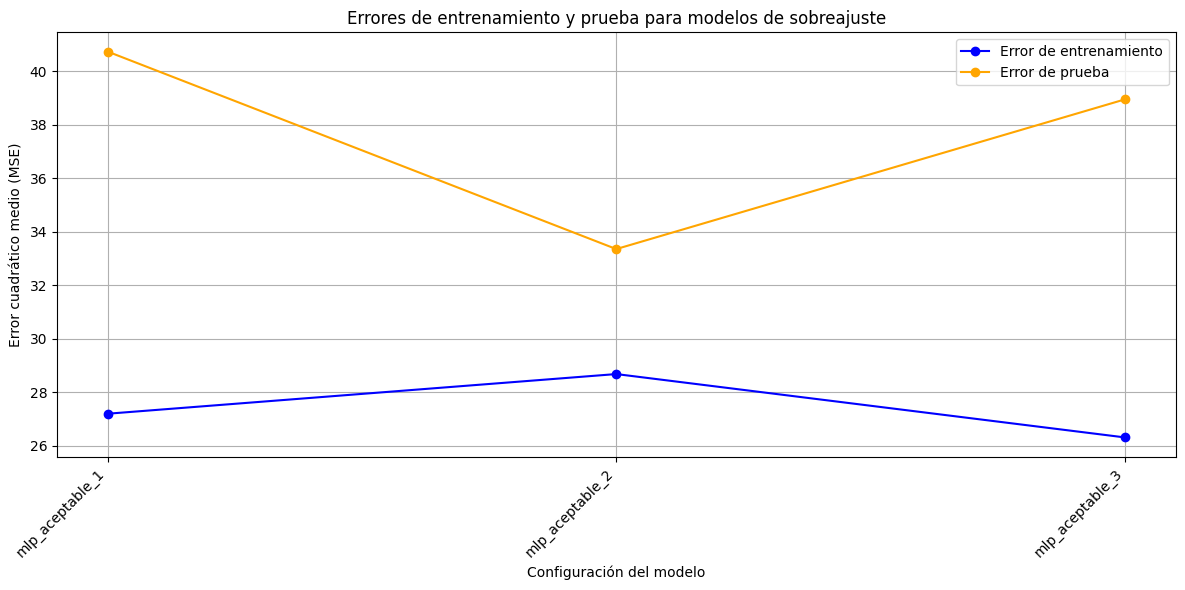

In [132]:
# Graficamos los errores de entrenamiento y prueba
# Usamos los nombres de los modelos y los MSE almacenados en results
model_labels = [result[0] for result in results]
train_error_values = [result[3] for result in results]  # MSE train
test_error_values = [result[4] for result in results]   # MSE test

plt.figure(figsize=(12, 6))
x = np.arange(len(model_labels))
plt.plot(x, train_error_values, label='Error de entrenamiento', marker='o', color='blue')
plt.plot(x, test_error_values, label='Error de prueba', marker='o', color='orange')
plt.xticks(x, model_labels, rotation=45, ha='right')
plt.xlabel('Configuraci√≥n del modelo')
plt.ylabel('Error cuadr√°tico medio (MSE)')
plt.title('Errores de entrenamiento y prueba para modelos de sobreajuste')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

* **Gr√°fico de Errores de Entrenamiento y Prueba (MSE):**
  * Este gr√°fico muestra la brecha entre el MSE de entrenamiento y el MSE de prueba para cada modelo. Para los modelos "aceptables", esta brecha es menor en comparaci√≥n con los modelos de sobreajuste analizados anteriormente.
  * La **menor brecha** entre las l√≠neas azul y naranja se observa en el modelo **`mlp_aceptable_2`**, lo que confirma visualmente que este modelo presenta un mejor equilibrio entre el rendimiento en entrenamiento y prueba, indicando una mejor generalizaci√≥n y menor sobreajuste.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



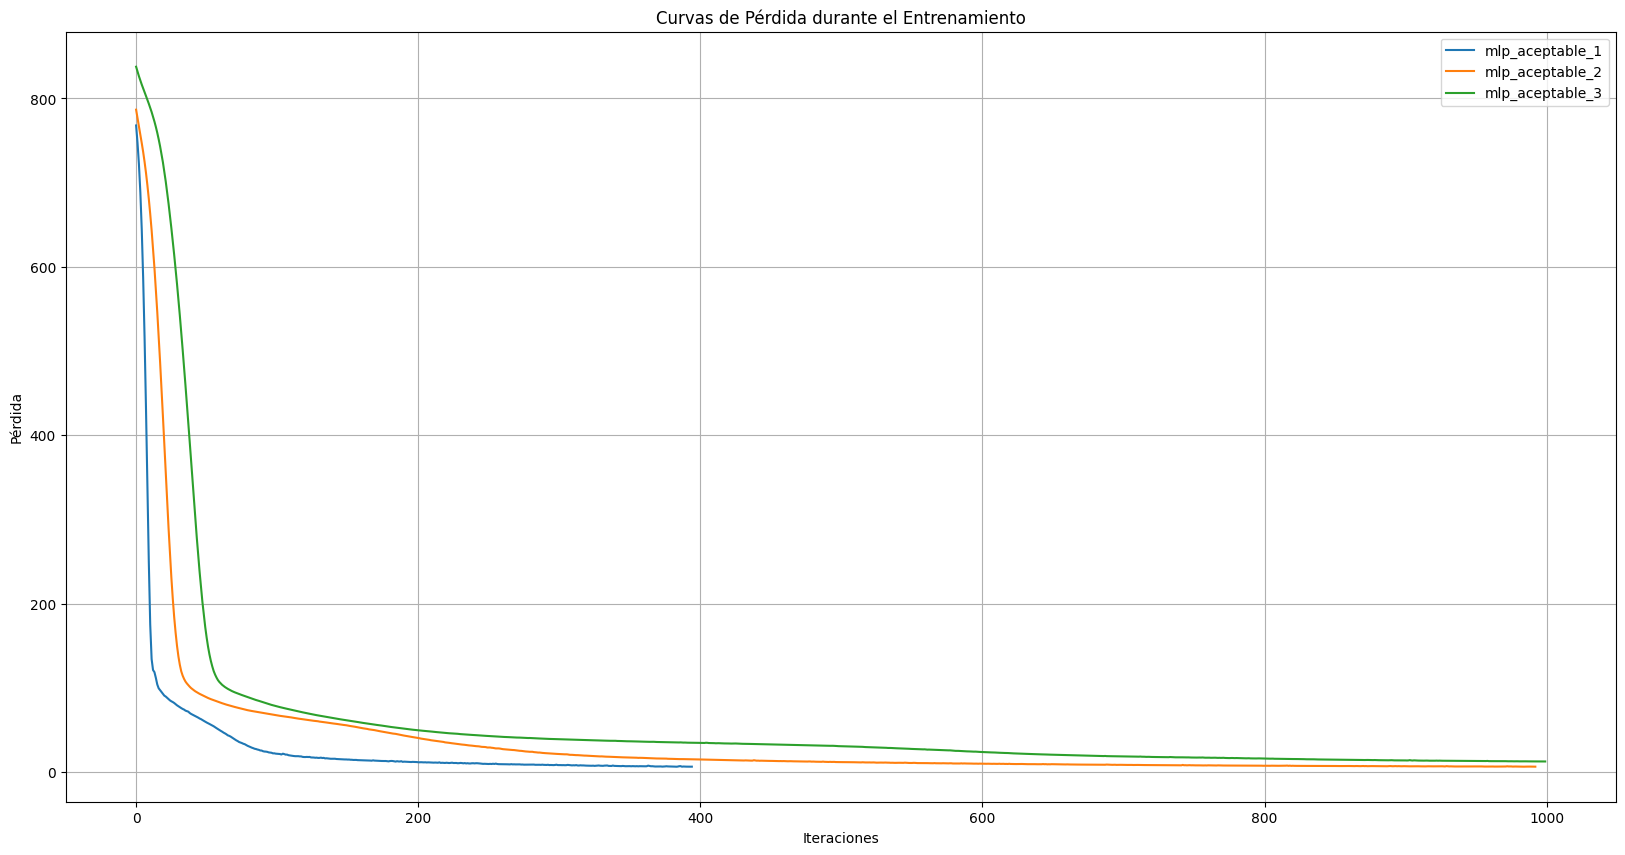

In [133]:
plt.figure(figsize=(20, 10))
for name, params in models:
    mlp = MLPRegressor(
        hidden_layer_sizes=params['hidden_layer_sizes'],
        activation='relu',
        solver='adam',
        alpha=params['alpha'],
        max_iter=params['max_iter'],
        early_stopping=False,  # Ajusta seg√∫n tu caso
        random_state=42,
    )
    mlp.fit(X_train_scaled, y_train)
    plt.plot(mlp.loss_curve_, label=name)
plt.xlabel('Iteraciones')
plt.ylabel('P√©rdida')
plt.title('Curvas de P√©rdida durante el Entrenamiento')
plt.legend()
plt.grid(True)
plt.show()

  * Las curvas de p√©rdida para los modelos "aceptables" muestran una disminuci√≥n inicial y luego tienden a estabilizarse. La inclusi√≥n de `early_stopping=True` significa que el entrenamiento se detiene cuando la p√©rdida en un conjunto de validaci√≥n (no mostrado expl√≠citamente, pero utilizado por `early_stopping`) deja de disminuir. Esto ayuda a prevenir que el modelo contin√∫e ajust√°ndose excesivamente a los datos de entrenamiento una vez que ha aprendido patrones generalizables. Las curvas alcanzan valores de p√©rdida mucho m√°s bajos que los modelos de subajuste, pero no tan bajos como los modelos de sobreajuste que fueron entrenados por un n√∫mero excesivo de iteraciones sin regularizaci√≥n.

**An√°lisis de los Modelos MLP "Aceptables":**

Para determinar cu√°l de los modelos MLP configurados como "aceptables" funciona mejor, analizamos sus m√©tricas de rendimiento (R¬≤, MSE, MAE) en el conjunto de prueba, ya que estas m√©tricas son indicativas de la capacidad de generalizaci√≥n del modelo a datos no vistos. Tambi√©n consideramos la brecha entre el rendimiento en el conjunto de entrenamiento y prueba para evaluar si hay signos de sobreajuste.

Analizando los resultados de las m√©tricas para los modelos "aceptables":

* **mlp\_aceptable\_1:**
  * MSE train: 27.20
  * MSE test: 40.73
  * R2 train: 0.90
  * R2 test: 0.84
* **mlp\_aceptable\_2:**
  * MSE train: 28.68
  * MSE test: 33.35
  * R2 train: 0.90
  * R2 test: 0.87
* **mlp\_aceptable\_3:**
  * MSE train: 26.31
  * MSE test: 38.94
  * R2 train: 0.91
  * R2 test: 0.85

**Determinaci√≥n del Modelo M√°s Aceptable:**

Observando las m√©tricas del conjunto de prueba, el modelo **`mlp_aceptable_2`** parece ser el m√°s aceptable entre las configuraciones probadas. Aunque su R¬≤ de entrenamiento (0.90) y MSE de entrenamiento (28.68) no son los "mejores" en comparaci√≥n con los otros dos modelos en el conjunto de entrenamiento, su rendimiento en el **conjunto de prueba** es superior:

* Tiene el **R¬≤ de prueba m√°s alto (0.87)**. Esto indica que explica la mayor proporci√≥n de la variabilidad en la resistencia a la compresi√≥n en datos no vistos.
* Tiene el **MSE de prueba m√°s bajo (33.35)**. Esto significa que sus predicciones tienen el error cuadr√°tico medio m√°s bajo en datos no vistos, lo que implica que sus predicciones est√°n, en promedio, m√°s cerca de los valores reales.

Adem√°s, la brecha entre el R¬≤ de entrenamiento y prueba, y entre el MSE de entrenamiento y prueba, es relativamente peque√±a para `mlp_aceptable_2` (0.90 vs 0.87 para R¬≤, y 28.68 vs 33.35 para MSE), lo que sugiere que este modelo logra un mejor equilibrio entre el ajuste a los datos de entrenamiento y la generalizaci√≥n a datos nuevos, minimizando el sobreajuste en comparaci√≥n con `mlp_aceptable_1` y `mlp_aceptable_3` (que muestran una mayor ca√≠da en el rendimiento del entrenamiento a la prueba).

La configuraci√≥n de `mlp_aceptable_2` (`hidden_layer_sizes`: (64, 32), `alpha`: 0.001, `max_iter`: 1000, con `early_stopping=True`) parece haber encontrado un buen punto de equilibrio. La regularizaci√≥n moderada (`alpha=0.001`) ayuda a evitar el sobreajuste, y las capas ocultas (`(64, 32)`) proporcionan suficiente capacidad para aprender las relaciones en los datos sin ser excesivamente complejas, mientras que `early_stopping` detiene el entrenamiento cuando el rendimiento en un conjunto de validaci√≥n (utilizado internamente por `early_stopping=True`) deja de mejorar.

### Conclusiones:

2.5 Agregue sus conclusiones comparando la experiencia y resultados del modelo de regresi√≥n lineal con el modelo del punto 2.4)

**M√©tricas del Modelo de Regresi√≥n Lineal (TP1):**

*   R-squared (Test): 0.63
*   RMSE (Test): 9.80

**M√©tricas del Modelo MLP (`mlp_aceptable_2`) (TP2):**

*   R-squared (Test): 0.87
*   RMSE (Test): 5.77




**An√°lisis de la Comparaci√≥n:**

Al comparar las m√©tricas en el conjunto de prueba, observamos una diferencia significativa en el rendimiento entre ambos modelos:

1.  **R-squared (R¬≤):** El modelo MLP (`mlp_aceptable_2`) tiene un R¬≤ de prueba mucho m√°s alto (0.87) en comparaci√≥n con el modelo de Regresi√≥n Lineal (0.63). Esto significa que el MLP es capaz de explicar una proporci√≥n mucho mayor de la variabilidad en la resistencia a la compresi√≥n del concreto en datos no vistos que el modelo lineal. El MLP captura mejor la relaci√≥n subyacente entre las caracter√≠sticas y el target.

2.  **RMSE (Error Cuadr√°tico Medio de la Ra√≠z):** El RMSE de prueba del modelo MLP (`mlp_aceptable_2`) (5.7) es considerablemente menor que el del modelo de Regresi√≥n Lineal (9.8). Un RMSE m√°s bajo indica que las predicciones del MLP est√°n, en promedio, mucho m√°s cerca de los valores reales de la resistencia a la compresi√≥n que las predicciones del modelo lineal. La magnitud de los errores cuadr√°ticos es significativamente menor en el modelo MLP.


**Conclusi√≥n General:**

El modelo de Red Neuronal Multicapa (`mlp_aceptable_2`), con una arquitectura y regularizaci√≥n adecuadas, demuestra un **rendimiento superior** al modelo de Regresi√≥n Lineal para predecir la resistencia a la compresi√≥n del concreto en este dataset. El MLP es capaz de capturar relaciones m√°s complejas en los datos que un modelo lineal simple, lo que se traduce en una mayor capacidad explicativa (mayor R¬≤) y errores de predicci√≥n cuadr√°ticos significativamente menores (menor MSE) en datos no vistos.

Esto confirma que para este problema particular, un modelo no lineal como el MLP es m√°s adecuado para capturar la complejidad de la relaci√≥n entre los componentes del concreto, la edad y su resistencia.